# 1. проведем разведовательный анализ (EDA) данных
для начала импортируем используемые библиотеки

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns 

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from pandas import Series
from sklearn.feature_selection import f_classif, mutual_info_classif

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import f_regression, mutual_info_regression

RANDOM_SEED = 42
VAL_SIZE = 0.20
from sklearn.model_selection import KFold, GridSearchCV, train_test_split, RandomizedSearchCV, cross_val_score

In [53]:
data = pd.read_csv('dataset_V2.csv')
data.head(3)

,Unnamed: 0,Unnamed: 0.1,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,equipment_dict,...,vendor,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price,id_car,rate_fuel
0,0,0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,Машина в отличном состоянии🥇\nКомплектация Ele...,1.8 LTR,152 N12,"{'cruise-control': True, 'tinted-glass': True,...",...,EUROPEAN,2.0,DUPLICATE,FORWARD_CONTROL,LEFT,True,True,829000.0,1105765221,7.7
1,1,1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,бежевый,Хорошее техническое и косметическое\nсостояние...,1.8 LTR,152 N12,"{'cruise-control': True, 'esp': True, 'adaptiv...",...,EUROPEAN,3.0,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,785000.0,1105672391,7.7
2,2,2,внедорожник 5 дв.,SKODA,https://auto.ru/cars/used/sale/skoda/yeti/1105...,пурпурный,Идеальное состояние автомобиля\nДилер Краснояр...,1.2 LTR,105 N12,"{'computer': True, 'ptf': True, 'rain-sensor':...",...,EUROPEAN,1.0,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,745000.0,1105201873,6.4


In [54]:
test = pd.read_csv('test.csv')
test.sample(3)

,Unnamed: 0,Unnamed: 0.1,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,...,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,rate_fuel
14061,14061,14061,внедорожник 5 дв.,NISSAN,https://auto.ru/cars/used/sale/nissan/murano/1...,серебристый,"{""id"":""7079175"",""name"":""LE+"",""available_option...",В отличном тех.состоянии-муж следил лучше чем ...,3.5 LTR,249 N12,...,вариатор,JAPANESE,3 или более,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен,10.9
47,47,47,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,серый,NaN,ЛОТ: 01223177\nАвтопрага Север\n\nВы можете по...,1.6 LTR,102 N12,...,механическая,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,7.1
5725,5725,5725,внедорожник 5 дв.,HONDA,https://auto.ru/cars/used/sale/honda/cr_v/1100...,зелёный,NaN,"Машина не новая, есть вмятины и потертости, но...",2.0 LTR,128 N12,...,автоматическая,JAPANESE,3 или более,6 месяцев,Оригинал,полный,Левый,Не требует ремонта,Растаможен,9.9


In [219]:
sample = pd.read_csv('sample_submission.csv')
sample.sample(3)

,sell_id,price
31941,1096352220,0
26082,1101307707,0
14755,1100365270,0


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94352 entries, 0 to 94351
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            94352 non-null  int64  
 1   Unnamed: 0.1          94352 non-null  int64  
 2   bodyType              94352 non-null  object 
 3   brand                 94352 non-null  object 
 4   car_url               94352 non-null  object 
 5   color                 94352 non-null  object 
 6   description           94352 non-null  object 
 7   engineDisplacement    94352 non-null  object 
 8   enginePower           94352 non-null  object 
 9   equipment_dict        94352 non-null  object 
 10  fuelType              94352 non-null  object 
 11  mileage               94352 non-null  float64
 12  modelDate             94352 non-null  float64
 13  model_info            94352 non-null  object 
 14  model_name            94352 non-null  object 
 15  numberOfDoors      

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            34686 non-null  int64  
 1   Unnamed: 0.1          34686 non-null  int64  
 2   bodyType              34686 non-null  object 
 3   brand                 34686 non-null  object 
 4   car_url               34686 non-null  object 
 5   color                 34686 non-null  object 
 6   complectation_dict    6418 non-null   object 
 7   description           34686 non-null  object 
 8   engineDisplacement    34686 non-null  object 
 9   enginePower           34686 non-null  object 
 10  equipment_dict        24690 non-null  object 
 11  fuelType              34686 non-null  object 
 12  image                 34686 non-null  object 
 13  mileage               34686 non-null  int64  
 14  modelDate             34686 non-null  int64  
 15  model_info         

как видно из данных, в тестовом датасете нет целевой переменной, которую необходимо предсказать. добавим ее

In [55]:
test['price'] = 1
test.shape

(34686, 36)

добавим функции, которые будут отрисовывать распределение признаков

In [96]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 6

def categorial_feature(column, data, rotate=90, x_shift_mult=0, percentage=True, num_categories=10):
    values = data[column].value_counts().index
    if len(values) > num_categories:
        values = values[:num_categories]
    values = list(values)
    data_curr_categories = data.query(f"{column} in {values}")
    curr_categories = data_curr_categories[column].values

    ax = sns.countplot(x=curr_categories, data=data, 
                       order=data[column].value_counts().index[:num_categories], 
                       orient="h", palette ="Spectral")
    
    if percentage:
        total = len(data[column])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total) #добавим в подпись процентное соотношение
            x = p.get_x() + x_shift_mult*p.get_width()
            y = p.get_y() + p.get_height()+8
            ax.annotate(percentage, (x, y)) 
    plt.xticks(rotation=rotate)


def numeric_feature(data, col,  bins=10):
    print(data[col].describe()[["min", "max", "25%", "50%", "75%", "std"]])
    sns.distplot(data[col], bins=bins)
    
    
    
def scatter_num_feature(data, num_features):
    for scat in num_features:
        data.plot(x = scat, y = 'price', kind = 'scatter', grid = True, title = f"Price VS {scat}")
#     return data.plot(x = col, y = 'price', kind = 'scatter', grid = True, title = f"Price VS {col}")

    

def plot_cat_col_vs_price(data, col, num_categories=4):
    values = data[col].value_counts().index
    if len(values) > num_categories:
        values = values[:num_categories]
    values = list(values)
    data_curr_categories = data.query(f"{col} in {values}")
    curr_categories = data_curr_categories[col].values
    sns.boxplot(x=curr_categories, y=data_curr_categories['price'], data = data)
    plt.title(col)
    plt.grid()

добавим функции, которые будем использовать в работе

In [97]:
#функция, показывающая основные статистики параметра
def print_col_info(dataset):
    print(f"Количество пропущенных значений: {dataset.isna().sum()}")
    
def print_duplicates_info(data):
    print(f"Num of duplicates by car_url: {data.duplicated(subset=['car_url']).sum()}")
    print(f"Num of duplicates by sell_id: {data.duplicated(subset=['sell_id']).sum()}")
    print(f"Num of duplicates by car_url, sell_id: {data.duplicated(subset=['car_url', 'sell_id']).sum()}")
    
def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))

def mape_print(val):
    print(f"Точность модели по метрике MAPE: {val * 100:0.2f}%")

проверим наличие дубликатов и пропусков в тестовом и тренировочном датасете

Дубликаты: 0


Series([], dtype: int64)

None


<AxesSubplot:>

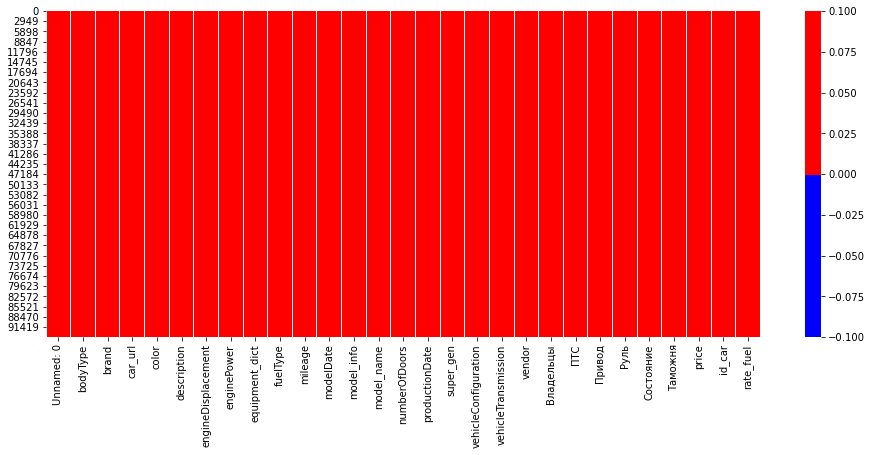

In [208]:
print (f'Дубликаты: {data.duplicated().sum()}')
print (display(data.isna().sum()[data.isna().sum() > 0]))
colours = ['blue', 'red']
plt.figure(figsize=(16, 6))
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

Дубликаты: 0


complectation_dict    28268
equipment_dict         9996
Владение              22691
ПТС                       1
dtype: int64

None


<AxesSubplot:>

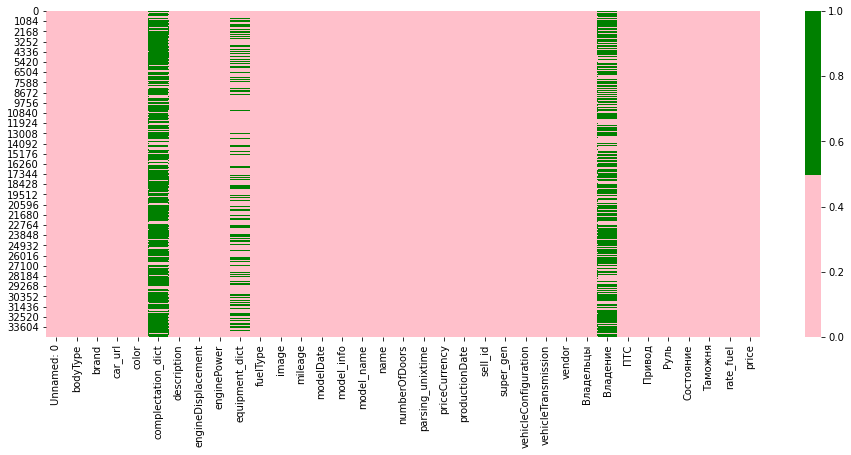

In [11]:
print (f'Дубликаты: {test.duplicated().sum()}')
print (display(test.isna().sum()[test.isna().sum() > 0]))
colours = ['pink', 'green']
plt.figure(figsize=(16, 6))
sns.heatmap(test.isnull(), cmap=sns.color_palette(colours))

как видно - дубликтов в обоих датасетах нет, но в тестовом есть признаки с пропусками, при том в некоторых показателях их существенное количество. К ним относятся: complectation_dict, equipment_dict, Владение, ПТС. В дальнейшем их рассмотрим подробнее и примем решение об их использовании. Признак цены был добавлен и там еще нет данных. 

Разделим признаки по видам.
- Категориальные: 'bodyType', 'brand', 'color', 'fuelType', 'model_name', 'vehicleTransmission', 'vendor', , 'Владение', 'ПТС', 'Привод', 'Руль', 'Состояние', 'Таможня'
- Числовые: 'mileage', 'numberOfDoors', 'sell_id', 'price','Владельцы'
- Временные: 'modelDate', 'productionDate', 'parsing_unixtime'
- Описательные: 'complectation_dict', 'description', 'engineDisplacement', 'enginePower', 'equipment_dict', 'model_info', 'name', 'vehicleConfiguration'

# Категориальные признаки

In [22]:
cat_features = ['bodyType', 'brand', 'color', 'fuelType', 'model_name', 'vehicleTransmission', 'vendor', 
                'Владельцы', 'ПТС', 'Привод', 'Руль', 'Состояние', 'Таможня']

dict_category = {}
for category in cat_features:
    data_category = test[category].value_counts()
    dict_category[category] = len(data_category)

print (dict_category)

{'bodyType': 24, 'brand': 12, 'color': 16, 'fuelType': 5, 'model_name': 544, 'vehicleTransmission': 4, 'vendor': 2, 'Владельцы': 3, 'ПТС': 2, 'Привод': 3, 'Руль': 2, 'Состояние': 1, 'Таможня': 1}


In [13]:
dict_category = {}
for category in cat_features:
    data_category = data[category].value_counts()
    dict_category[category] = len(data_category)

print (dict_category)

{'bodyType': 23, 'brand': 12, 'color': 16, 'fuelType': 5, 'model_name': 633, 'vehicleTransmission': 4, 'vendor': 3, 'Владельцы': 4, 'ПТС': 2, 'Привод': 3, 'Руль': 2, 'Состояние': 1, 'Таможня': 1}


как видно, в основном в признаки имеют относительно небольшое количество вариаций. Но следует отметить, что вариантов моделей автомобилей - 544 в тестовом датасете и 633 собранном, что существенно выбивается из общей тенденции. С другой стороны в таких признаках, как таможня и состояние всего по одному варианту, vendor (производитель) - 2 и 3 варианта соответственно, ПТС и Руль - по два. Для дальнейшего EDA-анализа можем их заменить на бинарные
Ранее было обнаружено, что признаке ПТС в тестовых данных есть пропуск. Рассмотрим его ближе

In [56]:
test['ПТС'].value_counts()

Оригинал    30098
Дубликат     4587
Name: ПТС, dtype: int64

In [57]:
# заменим пропуск в этом признаке на наиболее часто встречающееся значение
test['ПТС'].fillna(test.ПТС.mode()[0], inplace=True)

### bodyType

In [16]:
col = 'bodyType'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


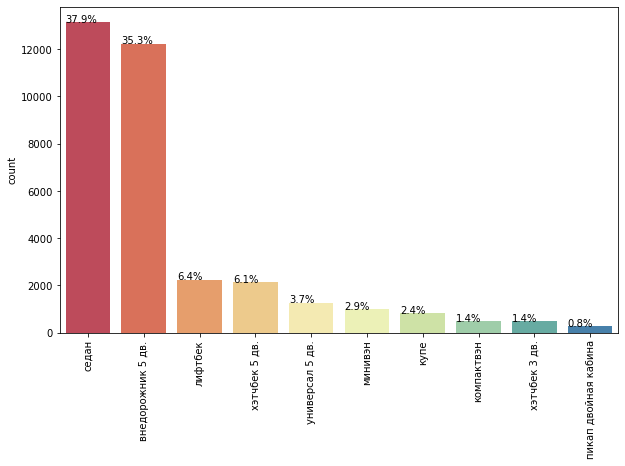

In [17]:
categorial_feature(col, test, rotate=90)

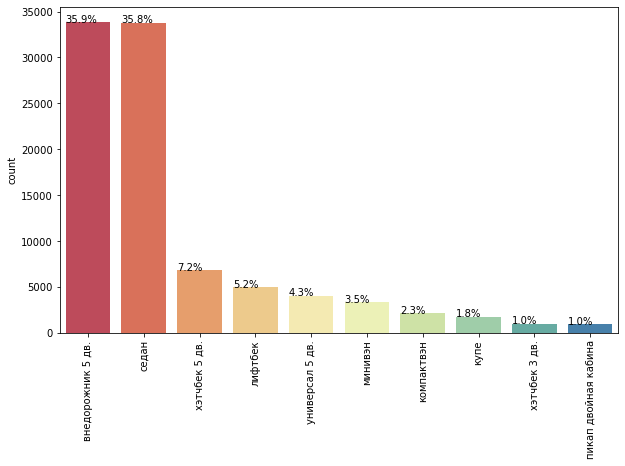

In [18]:
categorial_feature(col, data, rotate=90)

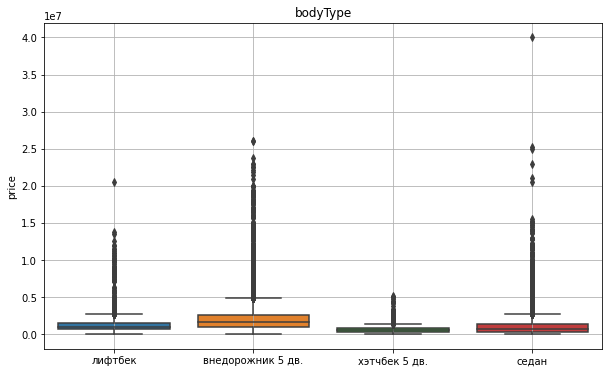

In [19]:
col = 'bodyType'
plot_cat_col_vs_price(data, col)

как видно, наиболее распространенные модели кузова - это седан и 5дверный внедорожник, средняя цена которого выше других типов кузова

### brand

In [20]:
col = 'brand'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


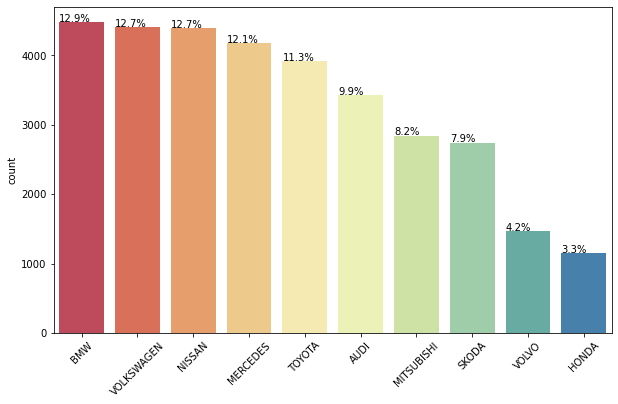

In [21]:
categorial_feature(col, test, rotate=45)

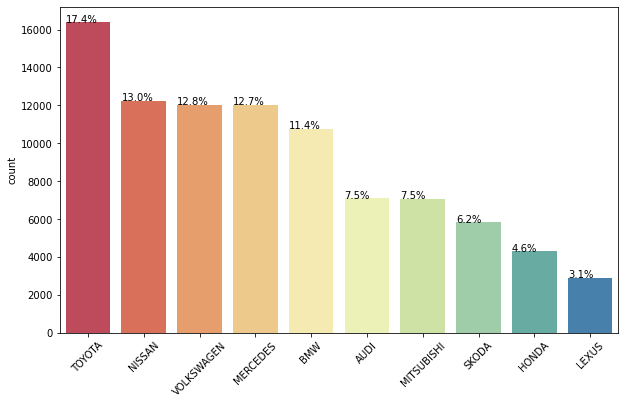

In [22]:
categorial_feature(col, data, rotate=45)

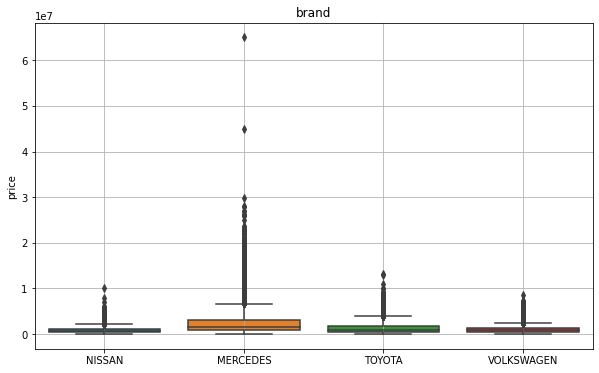

In [23]:
col = 'brand'
plot_cat_col_vs_price(data, col)

лидерами по моделям в тестовом датасете являются БМВ, Фольксвагены и Ниссаны,а также Мерседесы и Тойоты. Люксовых марок авто представлено меньше всего
в тренировочном датасете на первом месте находятся Тойоты, Ниссан и Фольксвагены также раздеяют между собой 2е и 3е места. И здесь также видно, что бренд напрямую влияет на цену, и у самой распространенной марки средняя цена выше, а также наблюдается больших разброс цены.

### model

In [24]:
col = 'model_name'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


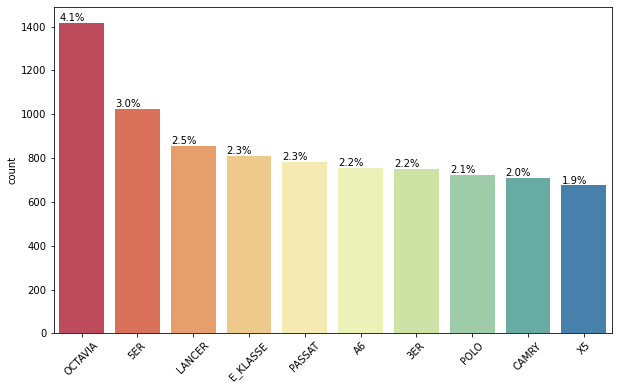

In [25]:
column = 'model_name'
categorial_feature(column, test, rotate=45)

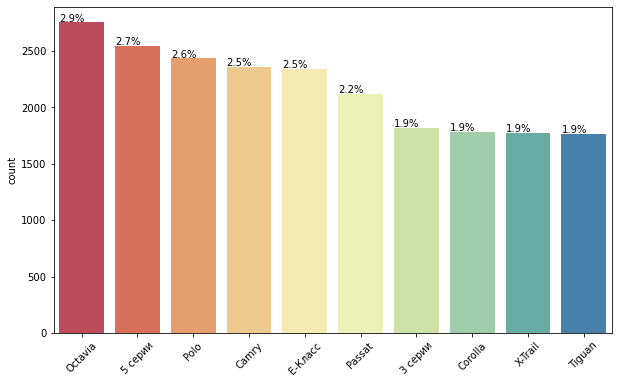

In [26]:
categorial_feature(column, data, rotate=45)

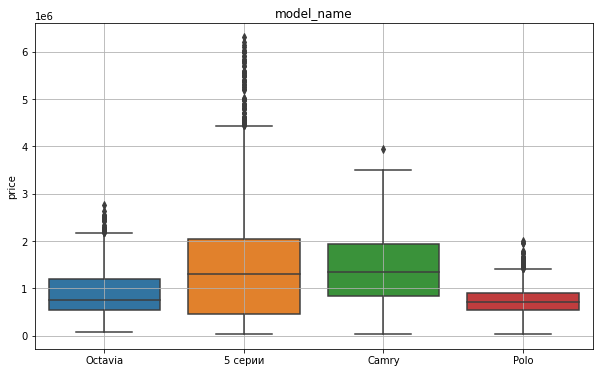

In [27]:
col = 'model_name'
plot_cat_col_vs_price(data, col)

в тестовом датасете наиболее популярные модели - это Шкода Октавиа, БМВ 5серии и Лансер от Митсубиси, в тренировочном - Шкода и БМВ также остались на первых местах, но Фольскваген Поло занял позицию Лансера. Также можно наблюдать, что у наиболее популярой модели оказалась более низка средняя цена по сравнению с БМВ, где и цена повыше, и разброс стоимости более широкий. У Поло средняя цена выше,но биапазон цен - меньше. И также следует отметить прямое влияние модели автомобиля на его цену

### color

In [28]:
col = 'color'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


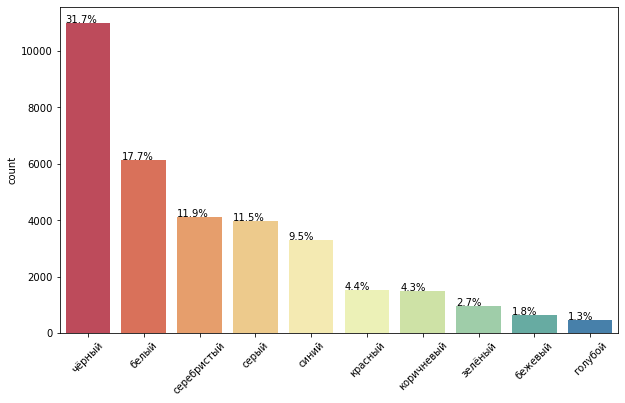

In [29]:
categorial_feature("color", test, rotate=45)

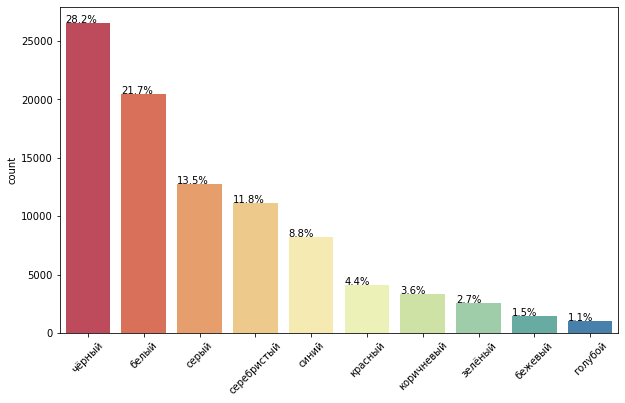

In [30]:
categorial_feature("color", data, rotate=45)

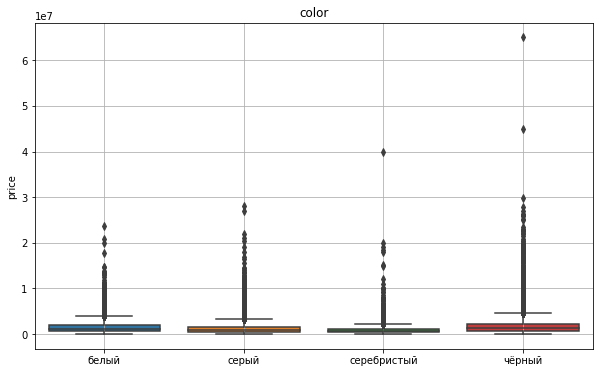

In [31]:
col = 'color'
plot_cat_col_vs_price(data, col)

самый распространенный цвет авто - черный. На boxplot видно, цвет машины не оказывает существенного воздействия на цену автомобиля

### fuel

In [32]:
col = 'fuelType'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


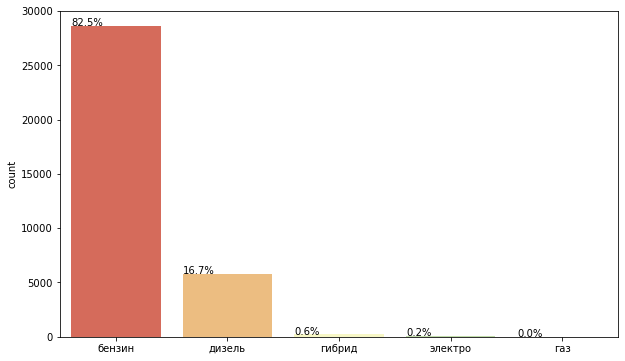

In [33]:
categorial_feature("fuelType", test, rotate=0)

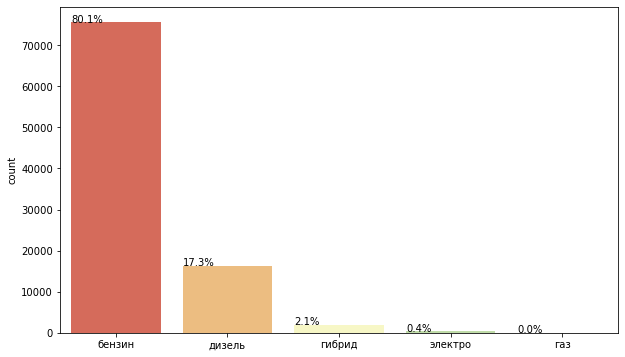

In [34]:
categorial_feature("fuelType", data, rotate=0)

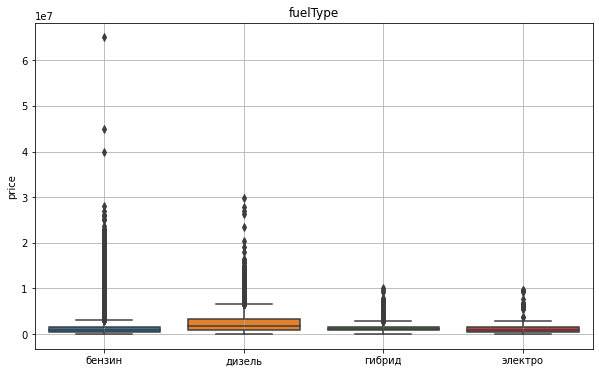

In [35]:
col = 'fuelType'
plot_cat_col_vs_price(data, col)

бензиновые двигатели ожидаемо наиболее распространенные среди автомобилей, но при этом средняя цена выше у авто с дизельным двигателем

### transmission

In [36]:
col = 'vehicleTransmission'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


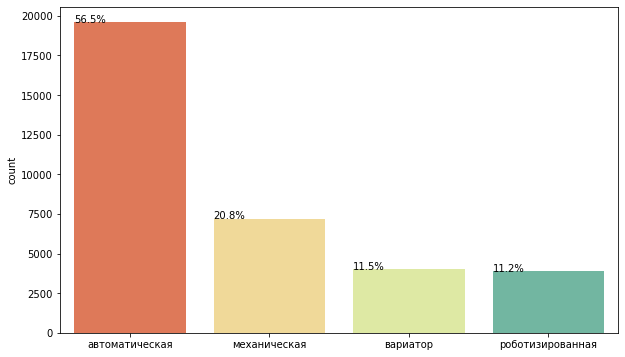

In [37]:
categorial_feature("vehicleTransmission", test, rotate=0)

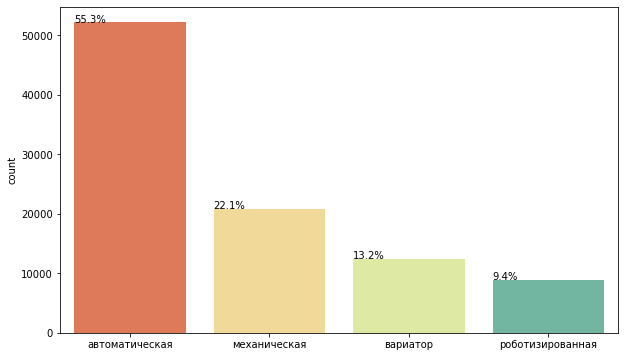

In [38]:
categorial_feature("vehicleTransmission", data, rotate=0)

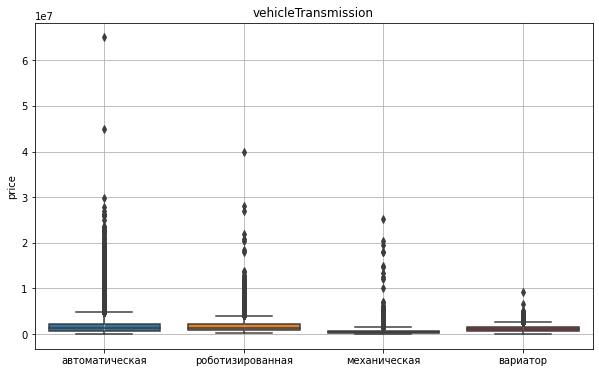

In [39]:
col = 'vehicleTransmission'
plot_cat_col_vs_price(data, col)

наиболее часто встречающиеся авто - с АКПП, что обусловлено популярностью иномарок, и средняя цена таких  авто выше, на boxplot видна зависимость цены от типа КПП

### vendor

In [40]:
col = 'vendor'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


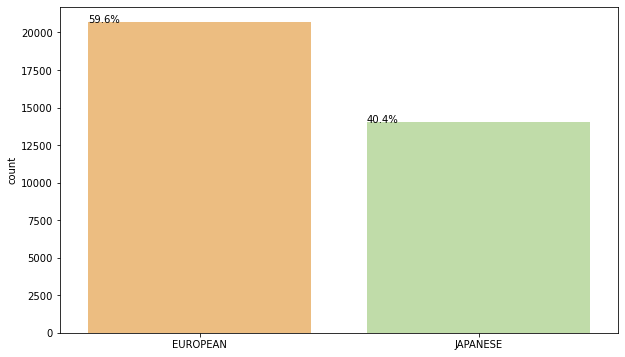

In [41]:
categorial_feature("vendor", test, rotate=0)

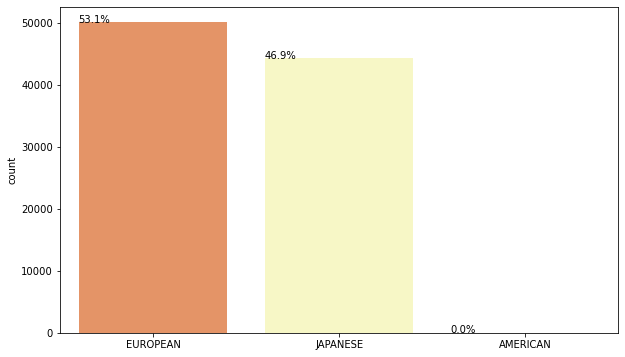

In [42]:
categorial_feature("vendor", data, rotate=0)

In [9]:
# американских авто оказалось очень маленький % (меньше 0), рассмотрим этот признак ближе
data.vendor.value_counts()

EUROPEAN    50073
JAPANESE    44273
AMERICAN        6
Name: vendor, dtype: int64

In [10]:
data.loc[data.vendor == 'AMERICAN']

,Unnamed: 0,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,equipment_dict,fuelType,...,vendor,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price,id_car,rate_fuel
81295,89685,внедорожник 5 дв.,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/atla...,красный,"Хороший, качественный семейный автомобиль. Ест...",2.0 LTR,238 N12,{},бензин,...,AMERICAN,1.0,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,2950000.0,1105669057,9.8
84557,93614,минивэн,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/euro...,красный,Авто с реальным пробегом! Завезён в 2008 г. из...,2.8 LTR,201 N12,{},бензин,...,AMERICAN,1.0,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,590000.0,1103781639,7.8
84914,94030,минивэн,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/euro...,зелёный,Продаю свой автомобиль. \nКузов в родной краск...,2.8 LTR,201 N12,"{'cruise-control': True, 'engine-proof': True,...",бензин,...,AMERICAN,3.0,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,730000.0,1105556887,7.8
84915,94031,минивэн,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/euro...,синий,Все вопросы по телефону. В салон не поставлю. ...,2.8 LTR,201 N12,"{'cruise-control': True, 'engine-proof': True,...",бензин,...,AMERICAN,3.0,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,770000.0,1105220954,7.8
85429,94631,минивэн,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/euro...,чёрный,Отличный семейный автомобиль. Езжу каждый день...,2.8 LTR,140 N12,{},бензин,...,AMERICAN,3.0,ORIGINAL,FORWARD_CONTROL,LEFT,True,True,650000.0,1105537751,7.8
87001,96359,внедорожник 5 дв.,VOLKSWAGEN,https://auto.ru/cars/used/sale/volkswagen/atla...,чёрный,Отличное авто!Состояние нового!Модификация 202...,2.0 LTR,235 N12,{},бензин,...,AMERICAN,1.0,ORIGINAL,ALL_WHEEL_DRIVE,LEFT,True,True,2900000.0,1104924511,10.7


In [58]:
# видимо, при заполнении анкеты произошла ошибка. Исправим данные
data['vendor'] = data['vendor'].str.replace(('AMERICAN'), 'EUROPEAN')

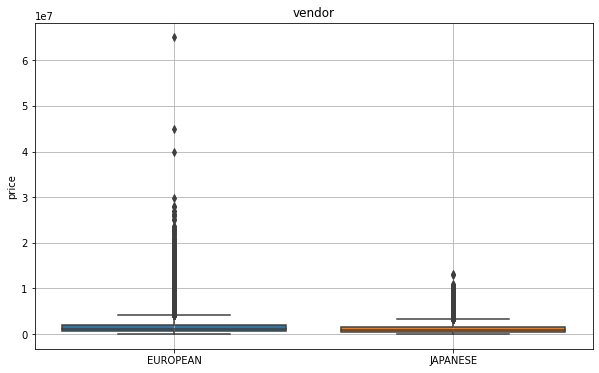

In [46]:
col = 'vendor'
plot_cat_col_vs_price(data, col)

вариантов производителей немного - либо европейские, либо японские, их распределение в тренировочном датасете приблизительно одинаковое. Также можно отметить, что распределение цены и средняя цена среди производителей авто приблизительно одинаковая

### Владельцы

In [47]:
col = 'Владельцы'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


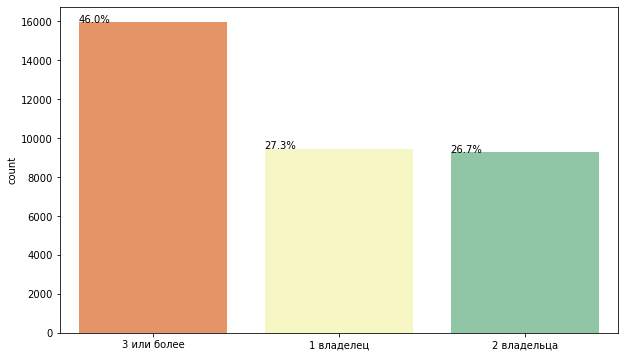

In [48]:
categorial_feature(col, test, rotate=0)

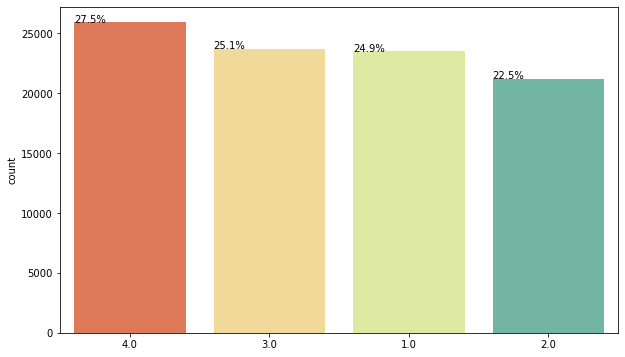

In [49]:
categorial_feature(col, data, rotate=0)

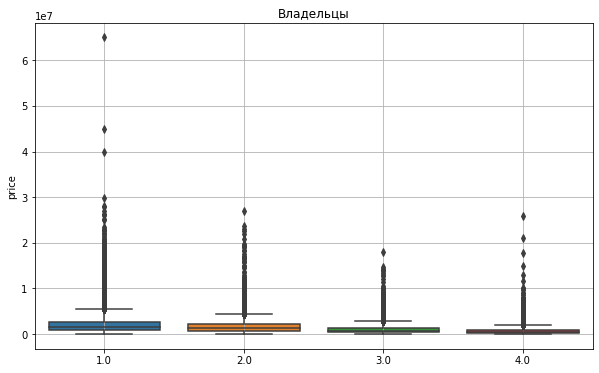

In [50]:
col = 'Владельцы'
plot_cat_col_vs_price(data, col)

в тестовом датасете почти половина авто имеет более 3 владельцев. Т.к этот признак оказывает существенное влияние на цену, преобразуем его, сделаем числовым. В тренировочном датасете представлено 4 категории кол-ва владельцев машин, но распределение не существенно отличается - почти половина машин имеет 3 и более владельцев
Как видно из boxplot у машин с одним владельцев наибольший разброс цен и более высокая средняя цена

In [59]:
owners_dict = {'1\xa0владелец': 1,
               '2\xa0владельца': 2,
               '3 или более': 3
               }
test.Владельцы = test.Владельцы.map(owners_dict)

# Числовые признаки

In [68]:
num_features = ['mileage', 'numberOfDoors', 'rate_fuel']

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'numberOfDoors'}>],
       [<AxesSubplot:title={'center':'rate_fuel'}>, <AxesSubplot:>]],
      dtype=object)

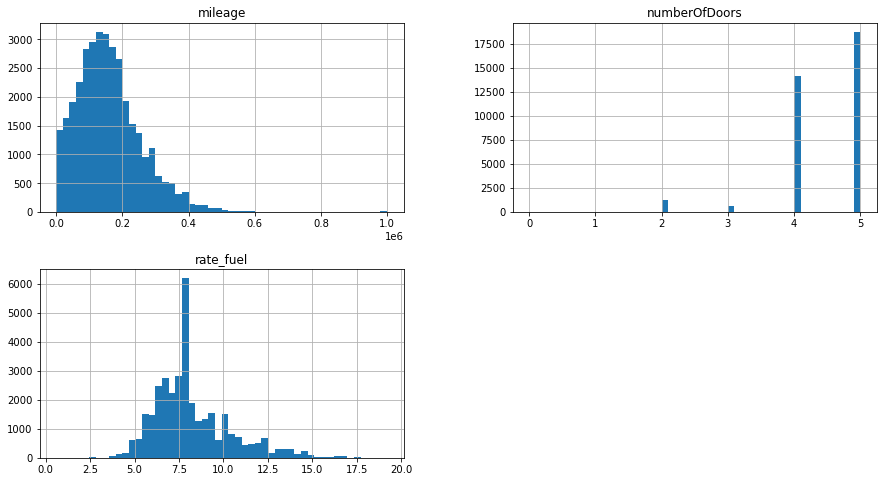

In [53]:
# рассмотрим распределение числовых признаков
test[num_features].hist(figsize=(15, 8), bins=50)

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'numberOfDoors'}>],
       [<AxesSubplot:title={'center':'rate_fuel'}>, <AxesSubplot:>]],
      dtype=object)

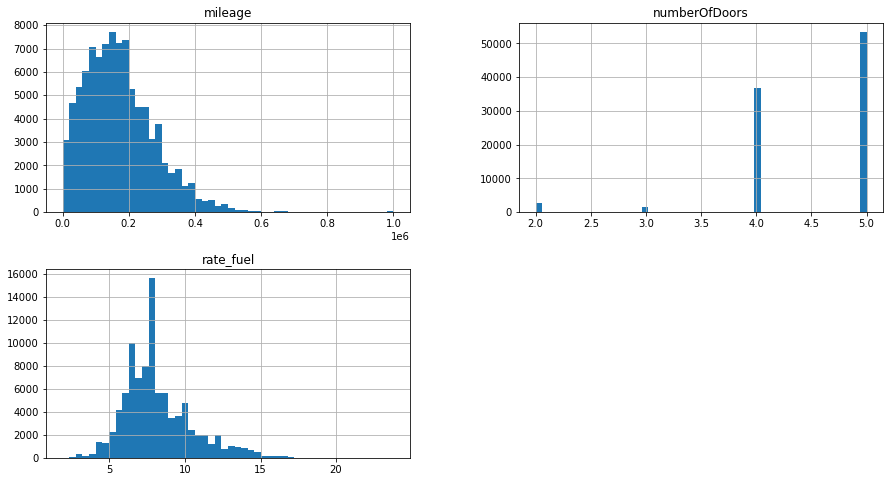

In [54]:
data[num_features].hist(figsize=(15, 8), bins=50)

прологарифимруем данные

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'numberOfDoors'}>],
       [<AxesSubplot:title={'center':'rate_fuel'}>, <AxesSubplot:>]],
      dtype=object)

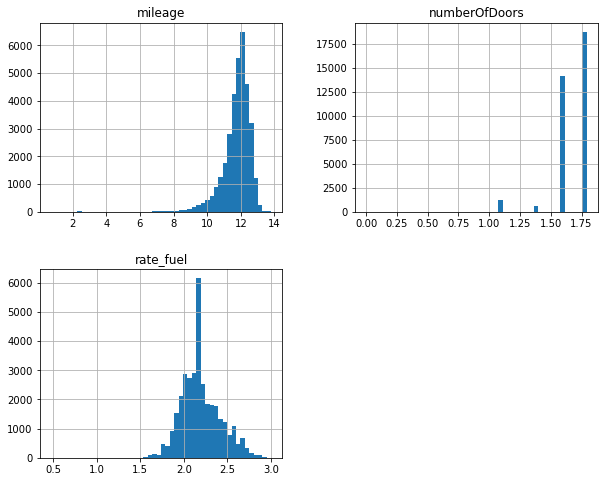

In [55]:
test_log = test.copy()
num_features_log = ['mileage', 'numberOfDoors', 'rate_fuel']
for q in num_features_log:
    test_log[q] = test_log[q].apply(lambda w: np.log(w + 1))
    
test_log[num_features_log].hist(figsize=(10, 8), bins=50)

array([[<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'numberOfDoors'}>],
       [<AxesSubplot:title={'center':'rate_fuel'}>, <AxesSubplot:>]],
      dtype=object)

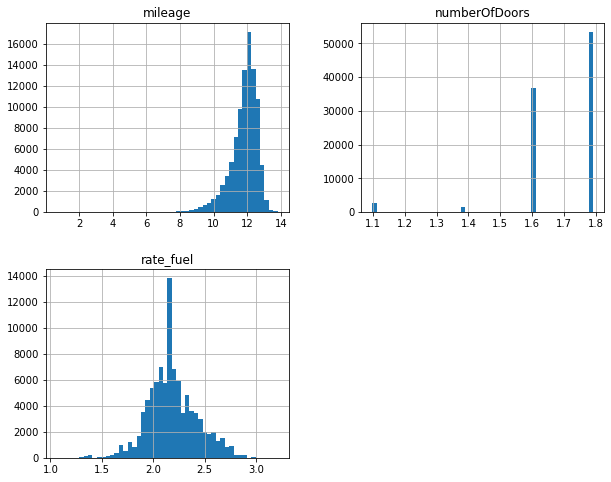

In [56]:
data_log = data.copy()
num_features_log = ['mileage', 'numberOfDoors', 'rate_fuel']
for q in num_features_log:
    data_log[q] = data_log[q].apply(lambda w: np.log(w + 1))
    
data_log[num_features_log].hist(figsize=(10, 8), bins=50)

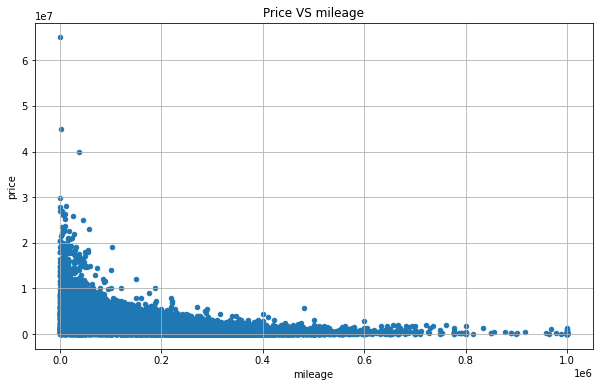

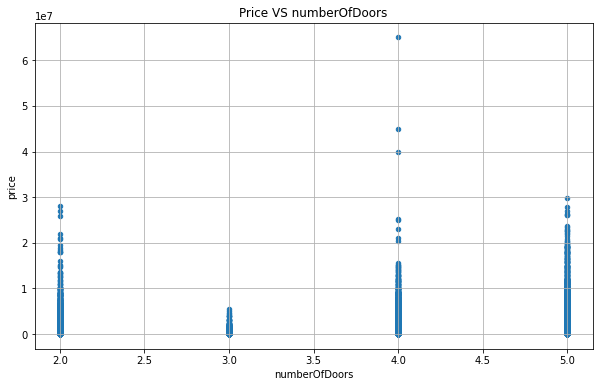

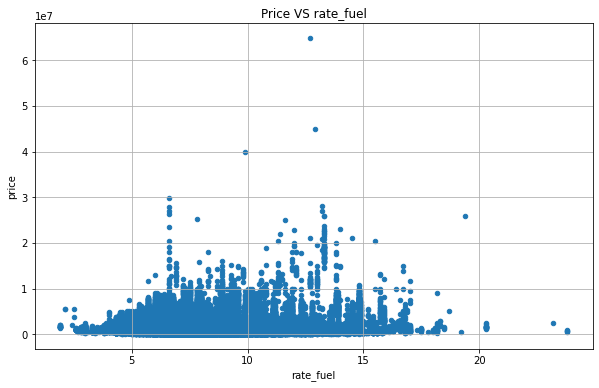

In [57]:
num_features = ['mileage', 'numberOfDoors', 'rate_fuel']
scatter_num_feature(data, num_features)

Разброс значений уменьшается после логарифмирования. Заметно, что в тестовых, и в тренировочных данных присутствуют как автомобили с пробегом, так и без, но в тренировочном датасете таких машин больше. Распределение таких автомобилей близко к нормальному. Также можно наблюдать близкое к нормальному распределение расхода топлива

На диаграмме рассеяния заметно, что автомобили с меньшиим пробегом имеют более высокую цену, а наибольшую цену просят за авто с расходом топлива в диапазоне от 6 до 12 л/100 км

# Временные признаки

In [24]:
date_features = ['modelDate', 'productionDate']

min    1904.000000
max    2020.000000
25%    2004.000000
50%    2008.000000
75%    2012.000000
std       7.415894
Name: modelDate, dtype: float64


C:\Users\007\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



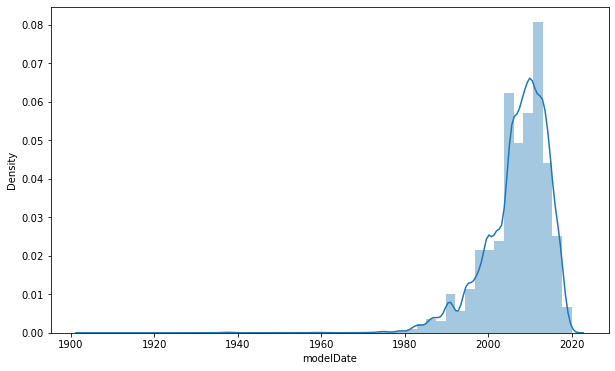

In [59]:
numeric_feature(test, 'modelDate', bins=50)

min    1936.000
max    2020.000
25%    2002.000
50%    2009.000
75%    2013.000
std       8.216
Name: modelDate, dtype: float64


C:\Users\007\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



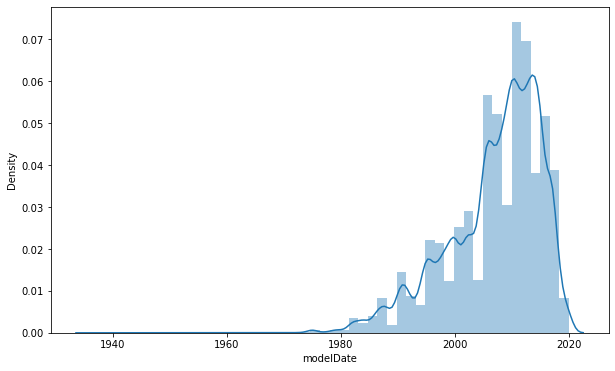

In [60]:
numeric_feature(data, 'modelDate', bins=50)

min    1904.000000
max    2020.000000
25%    2006.000000
50%    2011.000000
75%    2014.000000
std       7.047661
Name: productionDate, dtype: float64


C:\Users\007\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



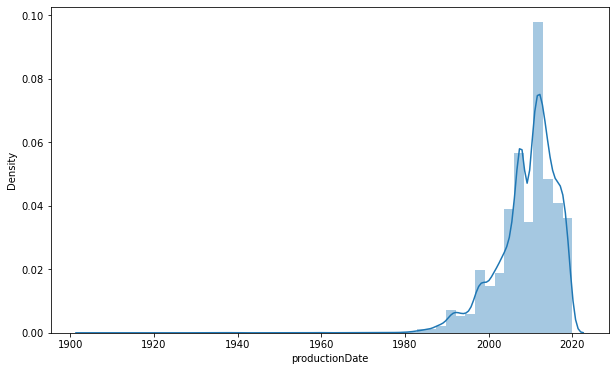

In [61]:
numeric_feature(test, 'productionDate', bins=50)

min    1937.000000
max    2020.000000
25%    2005.000000
50%    2011.000000
75%    2015.000000
std       7.885066
Name: productionDate, dtype: float64


C:\Users\007\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



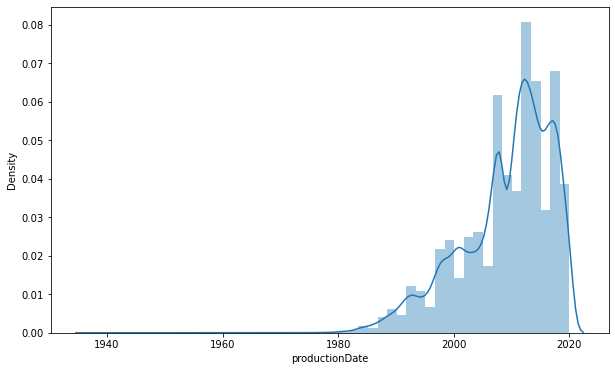

In [62]:
numeric_feature(data, 'productionDate', bins=50)

Год начала выпуска модели и год начала выпуска марок авто имеет ассиметричное распределение с длинным левым концом. Производство самой старой марки началось в 1904 году в тестовой безе и 1936 году в тренировочной, самой новой - в 2020

для дальнейшего использования информации о годах выпуска преобразуем ее в возраст модели и марки автомобилей и добавим в качестве признака в датасет

In [60]:
test['modelDate'] = 2021 - test.modelDate
test['productionDate'] = 2021 - test.productionDate

In [61]:
data['modelDate'] = 2021 - data.modelDate
data['productionDate'] = 2021 - data.productionDate

In [70]:
num_features.append('modelDate')
num_features.append('productionDate')

In [71]:
#добавим преобразованный признак владельцев в список
num_features.append('Владельцы')

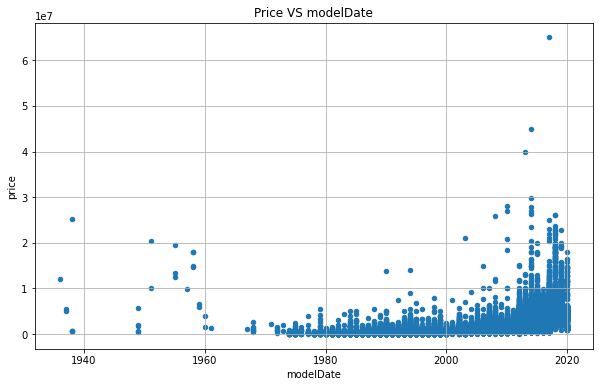

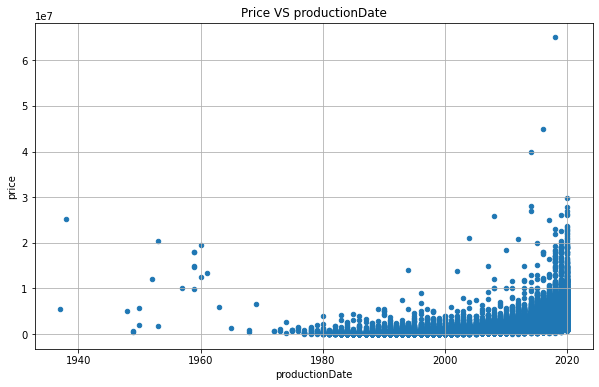

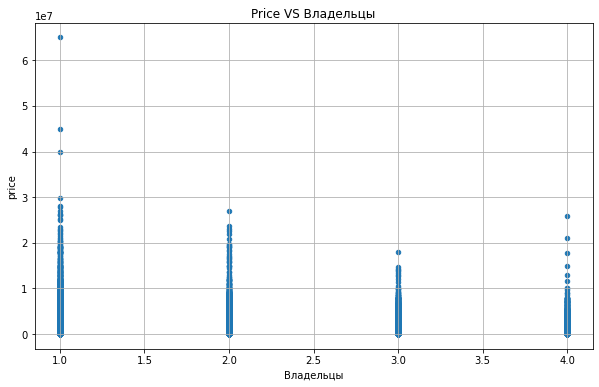

In [66]:
# рассмотрим статистику распределения цены среди добавленных признаков
num_features = ['modelDate', 'productionDate', 'Владельцы']
scatter_num_feature(data, num_features)

диаграмма распределения показывает, что год выпуска модели и год выпроизводства авто напрямую связаны с ценой автомобиля - чем младше авто, тем выше его цена. Исключение составляют раритетные авто старше 60 лет

# Описательные признаки

In [27]:
desc_features = ['complectation_dict', 'description', 'engineDisplacement', 'enginePower', 'equipment_dict', 
                 'model_info', 'name', 'vehicleConfiguration']

In [68]:
col = 'engineDisplacement'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


In [69]:
tst = test[col].value_counts(ascending = True)
dt = data[col].value_counts(ascending = True)
print(tst, dt)

3.9 LTR       1
5.3 LTR       1
1.1 LTR       4
4.9 LTR       4
6.6 LTR       6
5.8 LTR       7
6.3 LTR       8
5.9 LTR      12
5.2 LTR      12
6.2 LTR      28
5.4 LTR      31
4.3 LTR      32
4.1 LTR      35
3.4 LTR      36
3.3 LTR      44
0.7 LTR      53
6.0 LTR      53
 LTR         55
2.6 LTR      55
1.0 LTR      57
3.8 LTR      57
1.7 LTR      59
4.8 LTR      84
3.1 LTR      88
4.6 LTR     108
2.9 LTR     131
5.7 LTR     135
5.0 LTR     158
5.6 LTR     170
3.6 LTR     183
2.7 LTR     189
2.3 LTR     203
1.9 LTR     221
4.2 LTR     228
2.2 LTR     236
3.7 LTR     242
2.1 LTR     271
4.5 LTR     346
3.2 LTR     348
4.0 LTR     356
5.5 LTR     361
1.3 LTR     365
4.7 LTR     377
2.8 LTR     384
4.4 LTR     447
1.2 LTR     485
1.5 LTR     725
1.4 LTR    1635
3.5 LTR    1710
2.4 LTR    1745
2.5 LTR    2477
1.8 LTR    3349
3.0 LTR    3915
1.6 LTR    4973
2.0 LTR    7391
Name: engineDisplacement, dtype: int64 3.9 LTR        6
6.3 LTR       10
5.2 LTR       10
4.9 LTR       11
5.9 LTR      

и в тестовом, и в тренировочном датасетах встречаются незаполненные ячейки. Их незначительное кол-во и там, и там, заполним наиболее часто встречающимся значением объема двигателя

In [62]:
test['engineDisplacement'] = test['engineDisplacement'].apply(lambda x: '2.0 LTR' if x == ' LTR' else x)
data['engineDisplacement'] = data['engineDisplacement'].apply(lambda x: '2.0 LTR' if x == ' LTR' else x)

In [63]:
#данные об объеме двигателя и его мощности преобразуем в число, чтобы можно было в дальнейшем с ними рабтать
test.engineDisplacement = test.engineDisplacement.str.findall(r"\d.\d").str[0]
test.engineDisplacement = test.engineDisplacement.astype('float64')

data.engineDisplacement = data.engineDisplacement.str.findall(r"\d.\d").str[0]
data.engineDisplacement = data.engineDisplacement.astype('float64')

In [72]:
# внесем преобразованные признаки в список числовых
num_features.append('engineDisplacement')

In [324]:
# то же сделаем и с мощностью дигателя
col = 'enginePower'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 0
Количество пропущенных значений: 0


In [64]:
# то же сделаем и с мощностью дигателя
test.enginePower = test.enginePower.str.findall(r'^\S+').str[0]
test.enginePower = test.enginePower.apply(lambda x: int(x))

data.enginePower = data.enginePower.str.findall(r'^\S+').str[0]
data.enginePower = data.enginePower.apply(lambda x: int(x))

In [73]:
num_features.append('enginePower')

In [76]:
test[['engineDisplacement', 'enginePower', 'name']]
# в колонке 'name' дублируется информация о мощности и объеме, но там также содержатся и другие данные,
# которые могут быть использованы в дальнейшем

,engineDisplacement,enginePower,name
0,1.2,105,1.2 AMT (105 л.с.)
1,1.6,110,1.6 MT (110 л.с.)
2,1.8,152,DSG 1.8 AMT (152 л.с.)
3,1.6,110,1.6 AT (110 л.с.)
4,1.8,152,1.8 AT (152 л.с.)
...,...,...,...
34681,1.6,136,316i 1.6 AT (136 л.с.)
34682,2.0,190,520d xDrive 2.0d AT (190 л.с.) 4WD
34683,2.5,170,523i 2.5 AT (170 л.с.)
34684,2.0,184,20d 2.0d AT (184 л.с.) 4WD


In [77]:
data[['engineDisplacement', 'enginePower']]

,engineDisplacement,enginePower
0,1.8,152
1,1.8,152
2,1.2,105
3,1.4,122
4,1.6,102
...,...,...
94347,1.8,82
94348,2.5,103
94349,2.3,84
94350,1.8,100


array([[<AxesSubplot:title={'center':'engineDisplacement'}>,
        <AxesSubplot:title={'center':'enginePower'}>]], dtype=object)

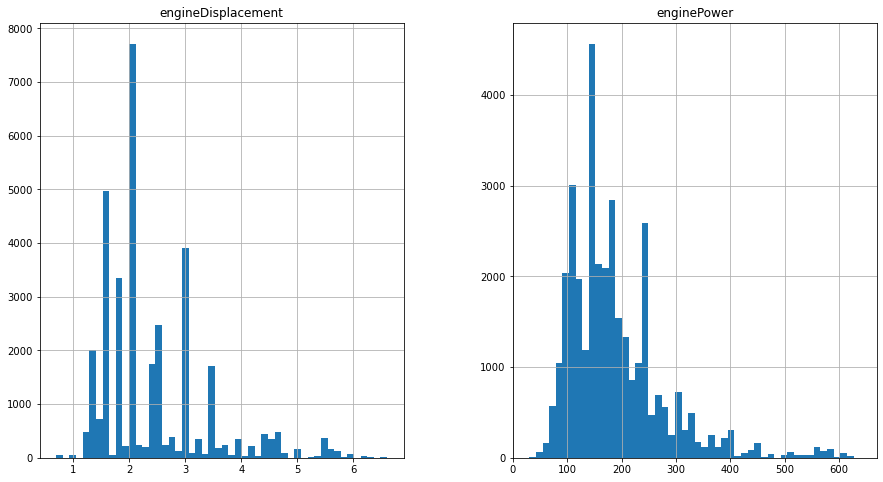

In [78]:
num_features1 = ['engineDisplacement', 'enginePower']
test[num_features1].hist(figsize=(15, 8), bins=50)

array([[<AxesSubplot:title={'center':'engineDisplacement'}>,
        <AxesSubplot:title={'center':'enginePower'}>]], dtype=object)

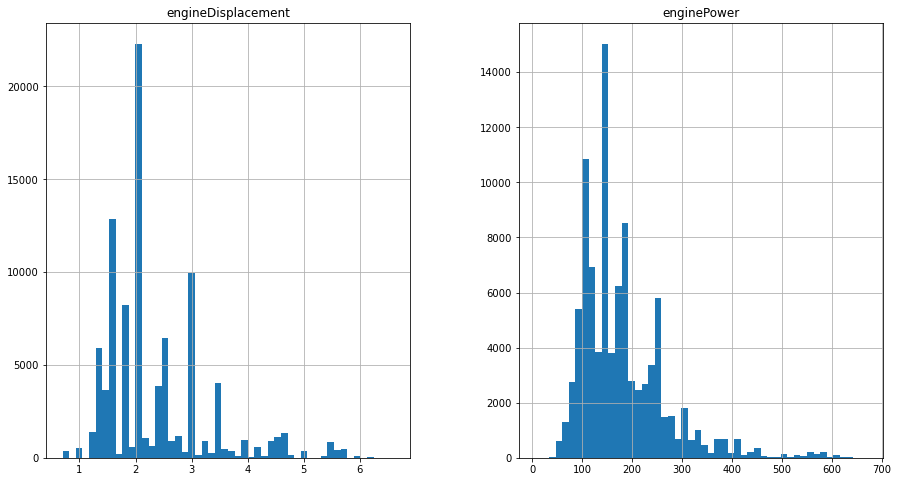

In [79]:
num_features1 = ['engineDisplacement', 'enginePower']
data[num_features1].hist(figsize=(15, 8), bins=50)

array([[<AxesSubplot:title={'center':'engineDisplacement'}>,
        <AxesSubplot:title={'center':'enginePower'}>]], dtype=object)

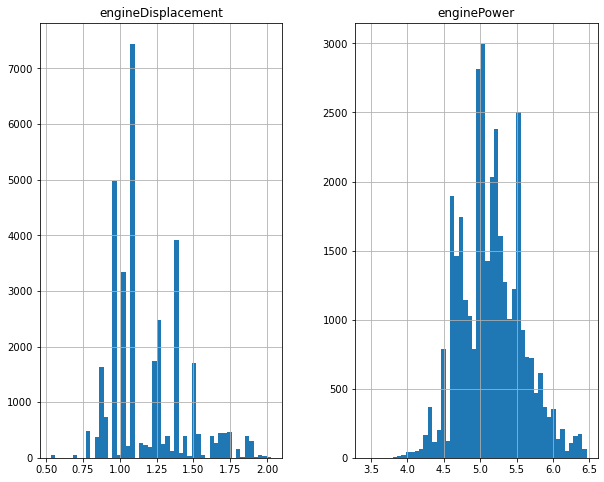

In [137]:
test_log = test.copy()
num_features1_log = ['engineDisplacement', 'enginePower']
for q in num_features1_log:
    test_log[q] = test_log[q].apply(lambda w: np.log(w + 1))
    
test_log[num_features1_log].hist(figsize=(10, 8), bins=50)

array([[<AxesSubplot:title={'center':'engineDisplacement'}>,
        <AxesSubplot:title={'center':'enginePower'}>]], dtype=object)

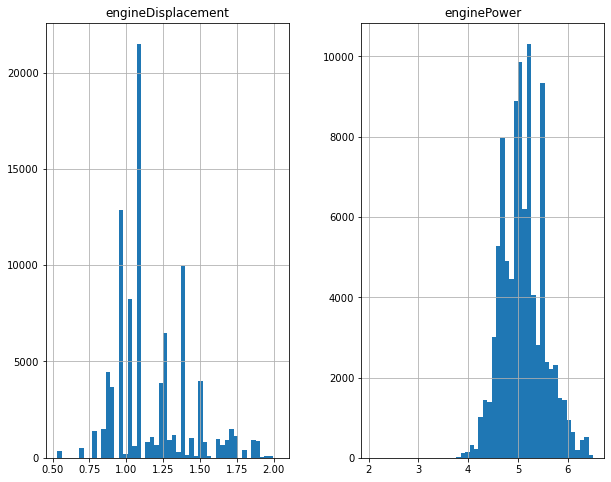

In [83]:
data_log = data.copy()
num_features1_log = ['engineDisplacement', 'enginePower']
for q in num_features1_log:
    data_log[q] = data_log[q].apply(lambda w: np.log(w + 1))
    
data_log[num_features1_log].hist(figsize=(10, 8), bins=50)

как видно, мощность автомобилей ассиметричное распределение с длинным правым концом. Наиболее распространенные машины имеют мощность порядка 170 л.с, самые мощные авто в датасете имеют мощность свыше 600 л.с. 
После логарифмирования распределение признака мощности и объема двигателя стало более нормальным

Данные о мощности двигателя можно использовать для рассчета транспортного налога. Созадим новый признак, разделив мощность на категории

In [65]:
# налоговая ставка зависит от мощности двигателя. Например, свыше 100 л.с. до 150 л.с. составляет 35 руб
def rate(power):
    if power > 250:
        return 150
    elif power > 200:
        return 75
    elif power > 150:
        return 50
    elif power > 100:
        return 35
    else:
        return 25

def calc_tax(row):
    return rate(row["enginePower"])*row["enginePower"]

test["tax"] = test.apply(lambda row: calc_tax(row), axis=1)
data["tax"] = data.apply(lambda row: calc_tax(row), axis=1)

In [74]:
# внесем новый признак в список числовых
num_features.append('tax')

In [86]:
test[['engineDisplacement', 'enginePower', 'tax']]

,engineDisplacement,enginePower,tax
0,1.2,105,3675
1,1.6,110,3850
2,1.8,152,7600
3,1.6,110,3850
4,1.8,152,7600
...,...,...,...
34681,1.6,136,4760
34682,2.0,190,9500
34683,2.5,170,8500
34684,2.0,184,9200


In [87]:
data[['engineDisplacement', 'enginePower', 'tax']]

,engineDisplacement,enginePower,tax
0,1.8,152,7600
1,1.8,152,7600
2,1.2,105,3675
3,1.4,122,4270
4,1.6,102,3570
...,...,...,...
94347,1.8,82,2050
94348,2.5,103,3605
94349,2.3,84,2100
94350,1.8,100,2500


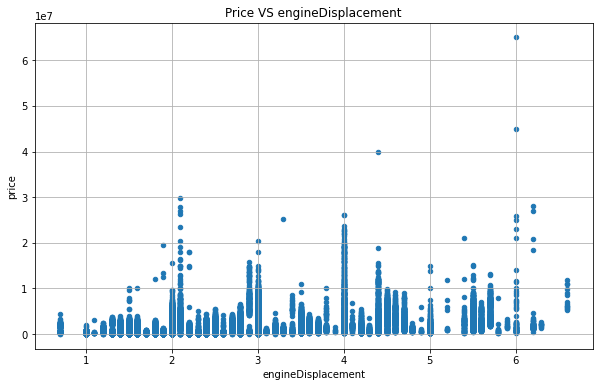

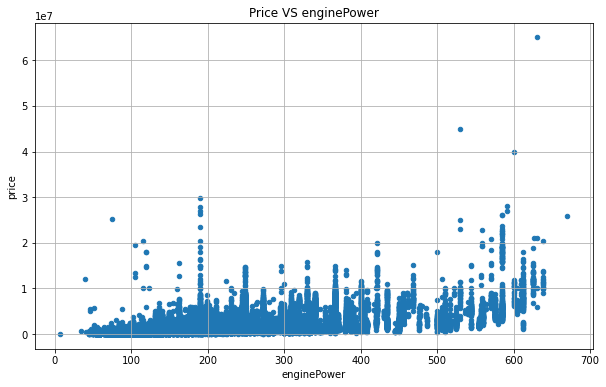

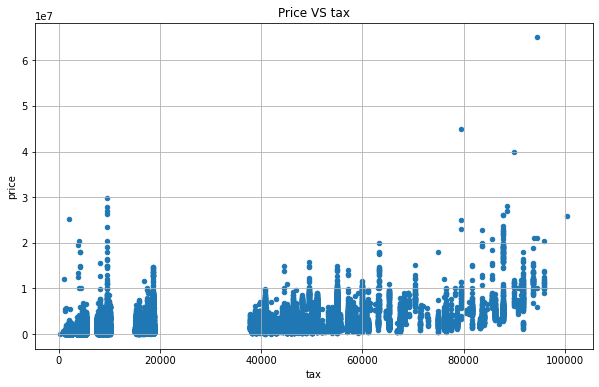

In [88]:
# рассмотрим статистику распределения цены среди добавленных признаков
num_features = ['engineDisplacement', 'enginePower', 'tax']
scatter_num_feature(data, num_features)

на диаграмме распределения видно, что и мощность, и объем двигателя распределены сравнительно равномерно относительно стоимости автомобиля

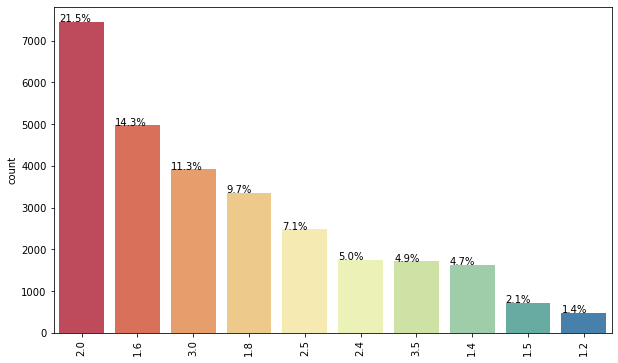

In [89]:
categorial_feature("engineDisplacement", test, rotate=90)

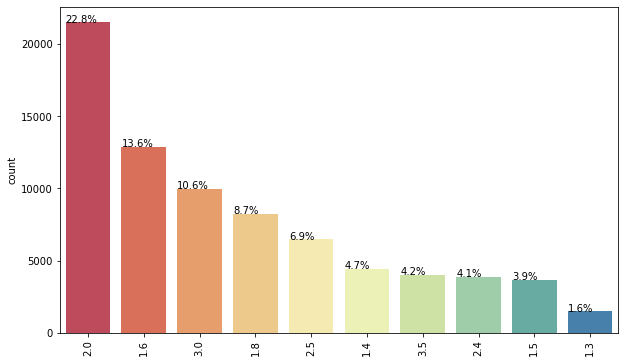

In [90]:
categorial_feature("engineDisplacement", data, rotate=90)

бОльшая часть представленных автомобилей имеют объем двигателя 2,0 л, затем 1,6 и 3,0 соответственно

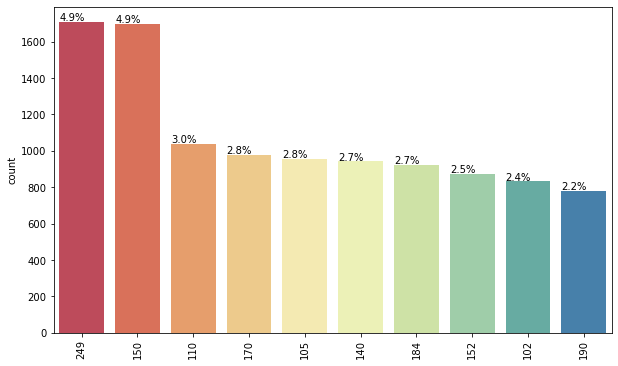

In [91]:
categorial_feature("enginePower", test, rotate=90)

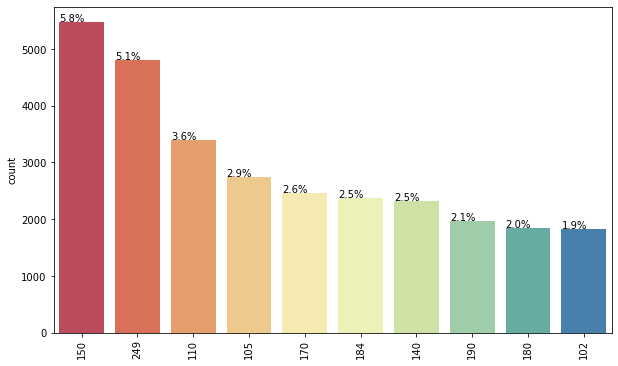

In [93]:
categorial_feature("enginePower", data, rotate=90)

больше всего автомобилей имеют мощность 249 и 150 л.с, что в тестовом, что в тренировочном датасете

In [75]:
# внесем price в список числовых
num_features.append('price')

In [76]:
num_features

['mileage',
 'numberOfDoors',
 'rate_fuel',
 'modelDate',
 'productionDate',
 'Владельцы',
 'engineDisplacement',
 'enginePower',
 'tax',
 'price']

ранее выяснили, логарифмирование "помогло" показателю возраста модели и возраста авто, а также мощности автомобилей, расходу топлива и налога, их распределение стало более равномерным, соответственно, можем прологарифмировать эти колонки в общем датасете

In [77]:
test['mileage'] = np.log(test['mileage'] + 1)
test['rate_fuel'] = np.log(test['rate_fuel'] + 1)
test['enginePower'] = np.log(test['enginePower'] + 1)
test['tax'] = np.log(test['tax'] + 1)

In [78]:
data['mileage'] = np.log(data['mileage'] + 1)
data['rate_fuel'] = np.log(data['rate_fuel'] + 1)
data['enginePower'] = np.log(data['enginePower'] + 1)
data['tax'] = np.log(data['tax'] + 1)

<AxesSubplot:>

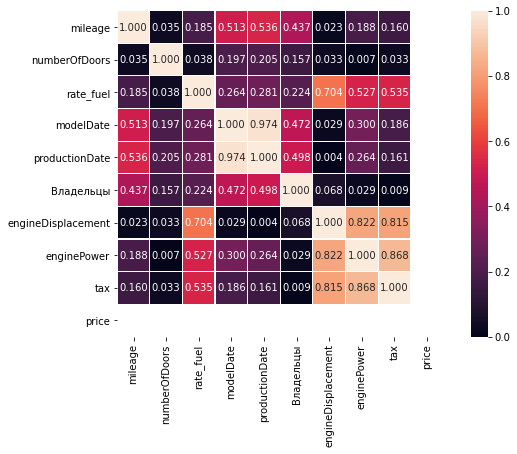

In [33]:
# Посмотрим корреляцию числовых признаков
sns.heatmap(test[num_features].corr().abs(), vmin=0, vmax=1, square=True,
              annot=True, fmt=".3f", linewidths=0.1)

<AxesSubplot:>

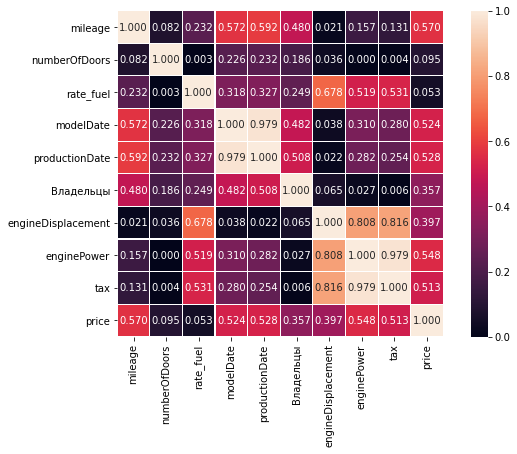

In [34]:
num_features
sns.heatmap(data[num_features].corr().abs(), vmin=0, vmax=1, square=True,
              annot=True, fmt=".3f", linewidths=0.1)

как видно из тепловой карты тестовых данных, наибольшая корреляционная зависимость  наблюдается между возрастом модели, годом выпуска авто. А также между мощностью машины и его объемом двигателя, и налогом, как производным признаком от мощности
что касается тренировочных, то тут также наиболее сильно коррелируют между собой возраст модели и автомобиля, мощность авто и объем двигателя,  а также расход топлива. Следует отметить, что с ценой больше всего прослеживется взаимосвязь с километражом

## Проверка значимости признаков

C:\Users\007\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning:

divide by zero encountered in true_divide



<AxesSubplot:>

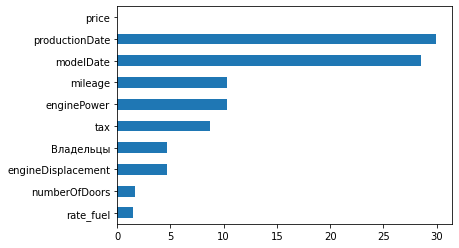

In [79]:
imp_num = pd.Series(f_classif(data[num_features], data['price'])[0], index = num_features)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', x=imp_num.values)

как видно, наиболее всего на цену влияет возраст авто и модели, пробег и мощность двигателя

## LabelEncoder

In [115]:
dict_category_test = {}
for category in test.columns:
    data_category = test[category].value_counts()
    dict_category_test[category] = len(data_category)

dict_category_data = {}
for category in data.columns:
    data_category = data[category].value_counts()
    dict_category_data[category] = len(data_category)

print (dict_category_test)
print (dict_category_data)

{'Unnamed: 0': 34686, 'bodyType': 24, 'brand': 12, 'car_url': 34686, 'color': 16, 'complectation_dict': 2364, 'description': 31732, 'engineDisplacement': 54, 'enginePower': 315, 'equipment_dict': 23705, 'fuelType': 5, 'image': 34557, 'mileage': 11268, 'modelDate': 66, 'model_info': 954, 'model_name': 544, 'name': 2780, 'numberOfDoors': 5, 'parsing_unixtime': 34686, 'priceCurrency': 1, 'productionDate': 69, 'sell_id': 34686, 'super_gen': 5890, 'vehicleConfiguration': 634, 'vehicleTransmission': 4, 'vendor': 2, 'Владельцы': 3, 'Владение': 275, 'ПТС': 2, 'Привод': 3, 'Руль': 2, 'Состояние': 1, 'Таможня': 1, 'rate_fuel': 147, 'price': 1, 'tax': 315, 'mileage_log': 11268, 'rate_fuel_log': 147, 'engineDisplacement_log': 54, 'enginePower_log': 315, 'tax_log': 315}
{'Unnamed: 0': 94352, 'bodyType': 23, 'brand': 12, 'car_url': 94352, 'color': 16, 'description': 88868, 'engineDisplacement': 53, 'enginePower': 336, 'equipment_dict': 57511, 'fuelType': 5, 'mileage': 25599, 'modelDate': 63, 'model_

In [80]:
# с помощью функции LabelEncoder() преобразуем часть описательных признаков в числовой формат
bin_cols = ['bodyType', 'color', 'vehicleTransmission', 'Привод', 'Руль']
label_encoder = LabelEncoder()
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])

# убедимся в преобразовании    
data.sample(3)

,Unnamed: 0,Unnamed: 0.1,bodyType,brand,car_url,color,description,engineDisplacement,enginePower,equipment_dict,...,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,price,id_car,rate_fuel,tax
38894,42418,42420,1,NISSAN,https://auto.ru/cars/used/sale/nissan/x_trail/...,13,Автомобиль в идеальном состоянии! Вложений не ...,2.0,4.976734,"{'cruise-control': True, 'tinted-glass': True,...",...,1.0,ORIGINAL,0,0,True,True,1850000.0,1105806986,2.140066,8.525360
70173,77014,77019,17,TOYOTA,https://auto.ru/cars/used/sale/toyota/corolla/...,4,Отличный автомобиль\nРасскажу по телефону\nВло...,1.5,4.663439,"{'immo': True, 'lock': True, 'turnbuckle': Tru...",...,4.0,DUPLICATE,1,1,True,True,222000.0,1105652667,2.197225,8.209580
67719,74323,74328,19,TOYOTA,https://auto.ru/cars/used/sale/toyota/avensis/...,12,"ОТС, без дтп, кости все целые, без гнили и ржа...",1.8,4.997212,"{'keyless-entry': True, 'alarm': True, 'climat...",...,3.0,ORIGINAL,1,0,True,True,860000.0,1105762706,2.041220,8.545975


In [81]:
for column in bin_cols:
    test[column] = label_encoder.fit_transform(test[column])

# убедимся в преобразовании    
test.sample(3)

,Unnamed: 0,Unnamed: 0.1,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,...,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,rate_fuel,price,tax
22490,22490,22490,15,LEXUS,https://auto.ru/cars/used/sale/lexus/is/110122...,2,NaN,"Пожалуйста, получите лучшее предложение у Ваше...",2.5,5.342334,...,1,NaN,Оригинал,0,0,Не требует ремонта,Растаможен,2.312535,1,9.655090
19174,19174,19174,15,TOYOTA,https://auto.ru/cars/used/sale/toyota/corolla/...,11,NaN,Артикул: 25893\n\nПРИ ПОКУПКЕ АВТОМОБИЛЯ В КРЕ...,1.6,4.828314,...,1,NaN,Оригинал,1,0,Не требует ремонта,Растаможен,2.066863,1,8.375860
19370,19370,19370,15,TOYOTA,https://auto.ru/cars/used/sale/toyota/camry/11...,13,NaN,«СКИДКА ТОЛЬКО ПРИ ПРОДАЖЕ В КРЕДИТ ИЛИ TRADE ...,2.5,5.204007,...,1,NaN,Оригинал,1,0,Не требует ремонта,Растаможен,2.230014,1,9.110631


In [82]:
# внесем преобразованные данные в список числовых
num_features.extend(bin_cols)

в датасетах есть данные моделях авто, и в тестовом, и в тренировочном датасете данные очень вариативные, разделить их на   условные ТОП-5..10..15 списка и остальные по каждому бренду не имеет смысла, т.к цена очень чувствительна к модели авто. Приведем эти данные к цифровому формату с помощью хеширования

In [83]:
data['model_name_hash'] = data.model_name.apply(lambda x: abs(hash(x)))
test['model_name_hash'] = test.model_name.apply(lambda x: abs(hash(x)))

In [130]:
# нормализируем эти данные для лучшего моделирования в дальнейшем
scaler = StandardScaler()
data['model_name_hash'] = scaler.fit_transform(data[['model_name_hash']])
test['model_name_hash'] = scaler.transform(test[['model_name_hash']])

In [85]:
# добавим новый признак в список числовых
num_features.append('model_name_hash')

ввиду добавления новых признаков в список числовых, еще раз проверим их значимость

C:\Users\007\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning:

divide by zero encountered in true_divide



<AxesSubplot:>

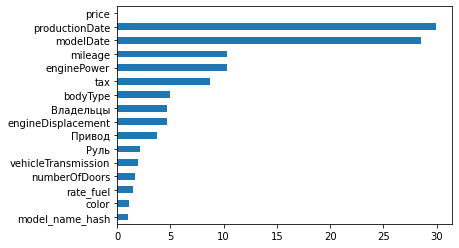

In [86]:
imp_num = pd.Series(f_classif(data[num_features], data['price'])[0], index = num_features)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', x=imp_num.values)

в тестовом и тренировочном датасете есть колонки, данные из  которых уже были использованы,либо сами данные неинформативны. Удалим их

In [87]:
rem_list_test = ['complectation_dict','description', 'model_info', 'priceCurrency', 
           'vehicleConfiguration','Владение', 'name', 'image', 'parsing_unixtime', 
           'vendor', 'ПТС', 'Таможня', 'Состояние', 'model_name']

In [88]:
test.drop(rem_list_test, axis=1, inplace=True)

In [89]:
rem_list_data = ['Таможня', 'Состояние', 'description','model_info', 'vehicleConfiguration',  'vendor', 'ПТС', 'model_name']

In [90]:
data.drop(rem_list_data, axis=1, inplace=True)

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34686 entries, 0 to 34685
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           34686 non-null  int64  
 1   Unnamed: 0.1         34686 non-null  int64  
 2   bodyType             34686 non-null  int32  
 3   brand                34686 non-null  object 
 4   car_url              34686 non-null  object 
 5   color                34686 non-null  int32  
 6   engineDisplacement   34686 non-null  float64
 7   enginePower          34686 non-null  float64
 8   equipment_dict       24690 non-null  object 
 9   fuelType             34686 non-null  object 
 10  mileage              34686 non-null  float64
 11  modelDate            34686 non-null  int64  
 12  numberOfDoors        34686 non-null  int64  
 13  productionDate       34686 non-null  int64  
 14  sell_id              34686 non-null  int64  
 15  super_gen            34686 non-null 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94352 entries, 0 to 94351
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           94352 non-null  int64  
 1   Unnamed: 0.1         94352 non-null  int64  
 2   bodyType             94352 non-null  int32  
 3   brand                94352 non-null  object 
 4   car_url              94352 non-null  object 
 5   color                94352 non-null  int32  
 6   engineDisplacement   94352 non-null  float64
 7   enginePower          94352 non-null  float64
 8   equipment_dict       94352 non-null  object 
 9   fuelType             94352 non-null  object 
 10  mileage              94352 non-null  float64
 11  modelDate            94352 non-null  float64
 12  numberOfDoors        94352 non-null  float64
 13  productionDate       94352 non-null  float64
 14  super_gen            94352 non-null  object 
 15  vehicleTransmission  94352 non-null 

In [93]:
# переименуем колонку id_car  в тренинговом датасете так же, как и в тестовом - sell_id'
data = data.rename(columns={'id_car': 'sell_id'})

In [94]:
num_features

['mileage',
 'numberOfDoors',
 'rate_fuel',
 'modelDate',
 'productionDate',
 'Владельцы',
 'engineDisplacement',
 'enginePower',
 'tax',
 'price',
 'bodyType',
 'color',
 'vehicleTransmission',
 'Привод',
 'Руль',
 'model_name_hash']

в дальнейшем, признаки, значимость которых ниже показателя "привод", не будем использовать в построении модели

## Словари

часть признаков в датасете представлена в виде словарей. Рассмотрим колонку equipment_dict и super_gen
Колонка equipment_dict представляет собой опции (подушки безопасности, подогрев сидений и т.д), которые есть в автомобиле, super_gen - это доп.параметры (расход топлива, высота клиренса etc). Предварительно из колонки super_gen была извлечена информация о расходе топлива, остальные данные особой ценности не представляют, данную колонку можно удалить

рассмотрим equipment_dict подробнее. Сначала проверим на наличие пропусков

In [98]:
col = 'equipment_dict'
print_col_info(test[col])
print_col_info(data[col])

Количество пропущенных значений: 9996
Количество пропущенных значений: 0


заменим в обоих датасетах пропущенные значения значением "Unknow"

In [99]:
# в тестовом просто заполняем пропуски
test['equipment_dict'].fillna('["Unknow"]', inplace=True)

In [100]:
# для замены в тренировочном датасете сначала неоходимо преобразовать данные из словаря в список
data['equipment_dict'] = data['equipment_dict'].str.findall(r"'(\b.*?\b)'")
test['equipment_dict'] = test['equipment_dict'].str.findall(r'"(\b.*?\b)"')

In [101]:
# все пустые списки заполняем значением "Unknow"
pas_list = []
for pas in data['equipment_dict']:
    if len(pas) < 1:
        pas_list.append('Unknow')
    else:
        pas_list.append(pas)

data['equipment_dict'] = pas_list

In [102]:
# применим фукнцию MultiLabelBinarizer() который "раскладывает" данные списка в бинарном виде "One-Hot-Encoded"
mlb = MultiLabelBinarizer()

In [103]:
equipment_data = mlb.fit_transform(data['equipment_dict'])
equipment_test = mlb.transform(test['equipment_dict'])


C:\Users\007\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:994: UserWarning:

unknown class(es) ['03B', '14U', '16U', '17U', '1N1', '235', '242', '246', '249', '25-inch-wheels', '27-inch-wheels', '270', '274', '2C5', '351', '364', '367', '3B3', '3L5', '3NZ', '3Q6', '431', '448', '475', '4A3', '4D3', '4I2', '4R2', '4R3', '4UC', '4UE', '500', '501', '513', '51U', '551', '670', '6NQ', '6R1', '6XD', '6XE', '728', '772', '776', '7AA', '7B2', '807', '810', '824', '871', '873', '881', '882', '883', '889', '8T6', '927', '989', '9AB', '9P5', '9R1', '9S3', '9S6', '9T1', 'B16', 'B63', 'DZ9', 'E0P', 'H06', 'KA2', 'L5C', 'P17', 'P29', 'P31', 'P44', 'PB0', 'PL2', 'PN0', 'PNQ', 'PW1', 'PX2', 'R01', 'R66', 'RAB', 'RVR', 'S7N', 'U09', 'U22', 'UI4', 'Unknow', 'WVA', 'advanced-frontlighting-system', 'airbag-2', 'airbag-4', 'airbag-6', 'audiosystem', 'climate-control', 'climate-control-3', 'driver-seat-manual', 'electro-seat', 'electro-window-all', 'halogen', 'immobiliser-not-standard', 'par

In [104]:
equipment_data = pd.DataFrame(data = equipment_data, columns = mlb.classes_)
equipment_test = pd.DataFrame(data = equipment_test, columns = mlb.classes_)

<AxesSubplot:>

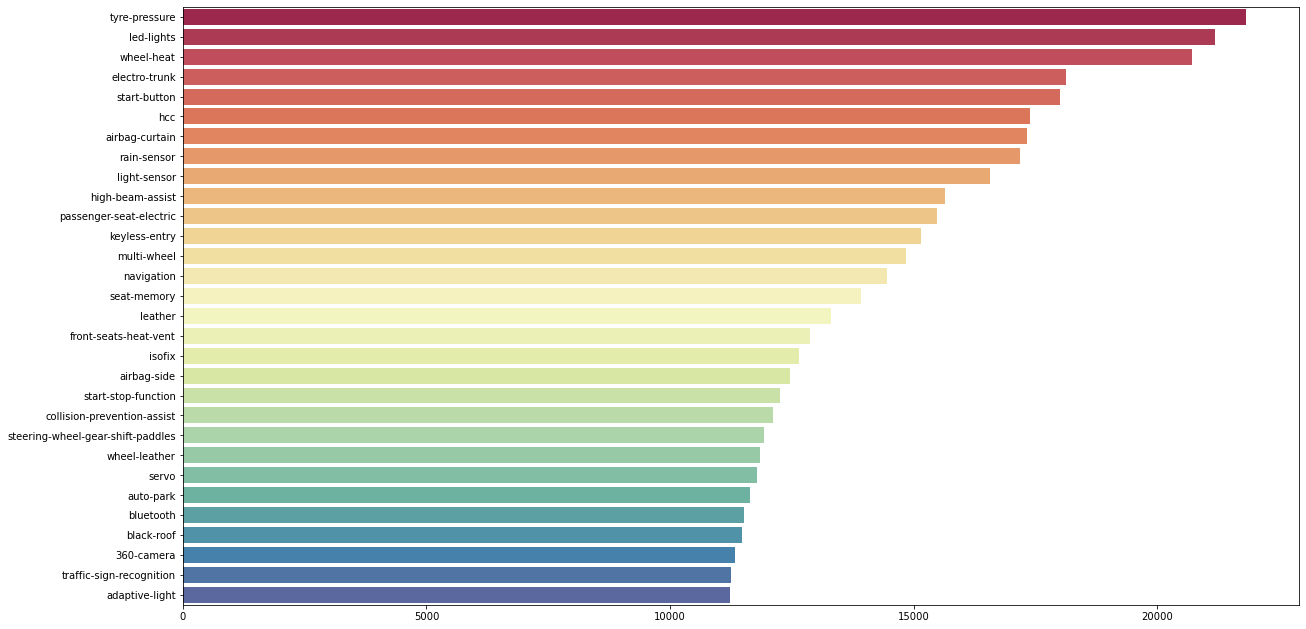

In [105]:
f_scores = f_regression(equipment_data, data.price)[0]
f_scores = pd.Series(f_scores, equipment_data.columns).sort_values(ascending=False)[:30]

plt.figure(figsize=(20,11))
sns.barplot(x=f_scores.values, y=f_scores.index, palette='Spectral')

In [106]:
# добавим кол-во признаков из equipment_dict (их всего более 250), которые присутствуют в описании данного авто
data['equipment_count'] = data['equipment_dict'].apply(len)
test['equipment_count'] = test['equipment_dict'].apply(len)

In [107]:
# добавим весь перечень признаков к тестовому и тренировочному датасету
data = pd.concat([data, equipment_data], axis=1)
test = pd.concat([test, equipment_test], axis=1)

In [110]:
# колонку equipment_dict удалим из датасета
data.drop(columns= ['equipment_dict'], inplace=True)
test.drop(columns= ['equipment_dict'], inplace=True)

In [111]:
# колонку super_gen также удаляем из датасета
data.drop(columns= ['super_gen'], inplace=True)
test.drop(columns= ['super_gen'], inplace=True)

## OneHotEncoding

In [139]:
# вначале объединим тренировочный и тестовый датасет, для более корректной дальнейшей обработки
data['sign'] = 1 # помечаем где у нас тренировочный датасет
test['sign'] = 0 # помечаем где у нас тестовый датасет

df = pd.concat([data, test], axis=0)
df.shape

(129038, 276)

In [113]:
# проверяем наличие дубликатов 
print_duplicates_info(df)

Num of duplicates by car_url: 586
Num of duplicates by sell_id: 586
Num of duplicates by car_url, sell_id: 586


дубликатов всего 586 на почти 130 тыс, что позволяет ими пренебречь

In [140]:
# и удаляем теперь колонки, которые уже не актуальны
df.drop(columns=['car_url', 'sell_id', 'Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [141]:
# с помощью функции get_dummies() преобразуем описательные признаки в бинарный формат и удаляем признак цены в тестовом датасете
feature = ['brand','fuelType' ]
df = pd.get_dummies(df, columns=feature, drop_first=True)
# data = df[~df.price.isna()]
# test = df[df.price.isna()]
# test = test.drop(columns=['price'])

In [142]:
df.head(3)

,bodyType,color,engineDisplacement,enginePower,mileage,modelDate,numberOfDoors,productionDate,vehicleTransmission,Владельцы,...,brand_MITSUBISHI,brand_NISSAN,brand_SKODA,brand_TOYOTA,brand_VOLKSWAGEN,brand_VOLVO,fuelType_газ,fuelType_гибрид,fuelType_дизель,fuelType_электро
0,8,1,1.8,5.030438,11.873400,13.0,5.0,9.0,0,2.0,...,0,0,1,0,0,0,0,0,0,0
1,8,0,1.8,5.030438,11.842236,13.0,5.0,9.0,0,3.0,...,0,0,1,0,0,0,0,0,0,0
2,1,9,1.2,4.663439,11.552156,12.0,5.0,9.0,3,1.0,...,0,0,1,0,0,0,0,0,0,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129038 entries, 0 to 34685
Columns: 285 entries, bodyType to fuelType_электро
dtypes: float64(11), int32(257), int64(2), uint8(15)
memory usage: 142.1 MB


## EDA

ранее мы уже преобразовали с помощью логарифма признаки, распределение которых улучшилось после логарифмирования. Также прологарифмируем и цену

In [156]:
df['price'] = np.log(df['price']+1)

In [157]:
y = df['price']

In [158]:
X = df.loc[:, df.columns != 'price']

In [ ]:
# df.loc[:, df.columns != 'col_n']

In [121]:
X.shape

(129038, 284)

In [122]:
y.shape

(129038,)

In [123]:
df.shape

(129038, 285)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [160]:
temp_train = X_train.copy()
temp_train['price'] = y_train

In [161]:
# Находим median по экземплярам engineDisplacement в трейне и размечаем тест
y_pred = X_test['engineDisplacement'].map(temp_train.groupby('engineDisplacement')['price'].median())

# predict = X_test['engineDisplacement'].map(tmp_train.groupby('engineDisplacement')['price'].median())

In [162]:
#оцениваем точность 

def mape_score(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))

mape_score(np.exp(y_test), np.exp(y_pred.values))

3.629111983753843

In [163]:
def mape_print(val):
    print(f"Точность модели по метрике MAPE: {val * 100:0.2f}%")
    
mape_print(mape_score(np.exp(y_test), np.exp(y_pred.values)))

Точность модели по метрике MAPE: 362.91%
